Name Surname: Teoman Türkoğlu

Student No: 150200095

---

Libraries to be used

---



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA as SklearnPCA #changed to avoid complications with our pca
from sklearn.metrics import accuracy_score, f1_score, root_mean_squared_error
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

# Build your own code-base (30 points)

Implement the methods provided and compare your implementation with Sklearn library

---

K-Nearest Neighbour (5 points)

In [ ]:
class KNN:
  def __init__(self, train_data, train_label, k=3):
    self.k = k
    self.train_data = train_data
    self.train_label = train_label

  def predict(self, test_data):
    predictions = []

    for test_point in test_data:
      #calculate Euclidean distance from test_point to all training points:
      distances = np.linalg.norm(self.train_data - test_point, axis=1)

      k_indices = np.argsort(distances)[:self.k] #get the indices of k nearest neighbors
      k_nearest_labels = self.train_label[k_indices] #get their labels

      #get the most common label:
      unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
      majority_label = unique_labels[np.argmax(counts)]

      predictions.append(majority_label) #add the majority label to predictions
    return np.array(predictions)

Gaussian Naive Bayes (5 points)

In [ ]:
class GNB:
  def __init__(self, train_data, train_label):
    self.train_data = train_data
    self.train_label = train_label

  def gaussian_probability(self, x, c):
    mean = self.means[c]
    variance = self.variances[c]

    exponent = np.exp(-((x - mean) ** 2) / (2 * (variance + 1e-9)))
    return (1 / np.sqrt(2 * np.pi * (variance + 1e-9))) * exponent

  def fit(self):
    self.class_priors = {}
    self.means = {}
    self.variances = {}
    self.classes = np.unique(self.train_label)
    n_samples, n_features = self.train_data.shape

    for c in self.classes:
      #select samples belonging to class c
      X_c = self.train_data[self.train_label == c]
      self.class_priors[c] = X_c.shape[0] / n_samples  #P(c)
      self.means[c] = np.mean(X_c, axis=0)  #mean of features
      self.variances[c] = np.var(X_c, axis=0)  #variance of features

  def predict(self, test_data):
    # Store predicted classes
    y_pred = []

    for x in test_data:
      # Calculate posterior for each class
      posteriors = {}
      for c in self.classes:
        # Calculate likelihood using Gaussian probability
        likelihood = self.gaussian_probability(x, c)
        log_likelihood = np.sum(np.log(likelihood + 1e-9))
        # Calculate posterior P(c|X) = P(X|c) * P(c)
        posteriors[c] = log_likelihood + np.log(self.class_priors[c])

      y_pred.append(posteriors)

    #get the predicted class with the maximum posterior probability
    predictions = [max(pred.items(), key=lambda item: item[1])[0] for pred in y_pred]
    return np.array(predictions)

Principal Component Analysis (5 points)

In [ ]:
class PCA:
  def __init__(self, data, n_components):
    self.data = data
    self.n_components = n_components

  def fit(self):
    self.mean = np.mean(self.data, axis=0) #compute the mean of the data
    data_centered = self.data - self.mean #center the data by subtracting the mean

    #calculate the covariance matrix of the centered data
    covariance_matrix = np.cov(data_centered, rowvar=False)
    #compute eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1] #sort eigenvalues in descending order
    #select the top n_components' eigenvectors
    self.components = eigenvectors[:, sorted_indices[:self.n_components]]

  def transform(self,x):
    x_centered = x - self.mean #center data by subtracting mean to align x with the same distribution as training data
    return np.dot(x_centered, self.components) #project centered data onto principal components to reduce the dimensions

Metrics (2+3 points)



In [ ]:
def rmse(y_true, y_pred):
  #calculate root mean square error between true and predicted values
  return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred)) ** 2))

def accuracyNf1_score(y_true, y_pred):
  #calculate accuracy by comparing true and predicted labels
  accuracy = sum(y_t == y_p for y_t, y_p in zip(y_true, y_pred)) / len(y_true)

  classes = set(y_true) #get unique classes
  f1_scores = {}

  for c in classes: #calculate F1 score for each class
    tp = sum((y_t == c) and (y_p == c) for y_t, y_p in zip(y_true, y_pred))
    fp = sum((y_t != c) and (y_p == c) for y_t, y_p in zip(y_true, y_pred))
    fn = sum((y_t == c) and (y_p != c) for y_t, y_p in zip(y_true, y_pred))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0 #calculate precision and recall for the class
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1_scores[c] = f1_score #calculate F1 score for the class and add to dictionary

  #calculate the average F1 score across all classes
  average_f1_score = sum(f1_scores.values()) / len(f1_scores) if f1_scores else 0

  return accuracy, average_f1_score, f1_scores


Visualization Tools (5 points)

In [ ]:
class Visualization:
  def __init__(self):
    pass

  #plots accuracy of KNN for different values of k (number of neighbors)
  def plot_performance_vs_k(self, X_train, y_train, X_test, y_test, max_k=10):
    k_values = range(1, max_k + 1)
    accuracies = []

    for k in k_values: #iterate through values of k and evaluate accuracy for each
      knn = KNN(X_train, y_train, k=k) #initialize KNN with k neighbors
      y_pred = knn.predict(X_test) #predict labels for test set

      accuracy = np.mean(y_pred == y_test) #calculate accuracy
      accuracies.append(accuracy) #store accuracy for this k

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, accuracies, marker='o')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy")
    plt.title("KNN Performance and Effect of Neighbor Count")
    plt.show() #plot accuracy vs. k

  #plots KNN decision boundaries for a 2D feature space and visualizes the data points
  def plot_knn_decision_boundaries(self, X, y, n_neighbors=3):
    h = .02 #step size in the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #min/max for feature 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #min/max for feature 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    knn = KNN(X, y, k=n_neighbors) #initialize KNN with specified neighbors
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) #predict over grid for boundary
    Z = Z.reshape(xx.shape) #reshape to match grid dimensions

    plt.figure(figsize=(8, 6)) #plot decision boundaries with data points
    plt.contourf(xx, yy, Z, alpha=0.3) #decision boundary plot

    #plot each class with a distinct color and label
    for i, color in enumerate(["red", "green", "blue"]):
      plt.scatter(X[y == i, 0], X[y == i, 1], label=f"Sınıf {i}", edgecolor="k", c=color)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"KNN Decision Boundaries (k={n_neighbors})")
    plt.legend(["Class 0", "Class 1", "Class 2"])
    plt.show()

  #applies PCA to data and plots the 2D projection, coloring points by class label
  def plot_pca_2d(self, data, labels, n_components=2):
    pca = PCA(data, n_components=n_components) #initialize PCA with n_components
    pca.fit() #fit PCA to data
    data_pca = pca.transform(data) #transform data into the PCA space

    plt.figure(figsize=(8, 6)) #scatter plot of the data in the reduced PCA space
    for label in np.unique(labels): #plot each class with a unique color
      plt.scatter(data_pca[labels == label, 0], data_pca[labels == label, 1], label=f"Sınıf {label}")

    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA - 2D Projection")
    plt.legend(["Class 0", "Class 1", "Class 2"])
    plt.show()

  def compare_with_library_models(self, X_train, y_train, X_test, y_test, custom_knn, custom_gnb):
    #custom model predictions
    custom_knn_preds = custom_knn.predict(X_test)
    custom_gnb_preds = custom_gnb.predict(X_test)

    #library KNN and GNB predictions
    sklearn_knn = KNeighborsClassifier(n_neighbors=custom_knn.k)
    sklearn_knn.fit(X_train, y_train)
    sklearn_knn_preds = sklearn_knn.predict(X_test)

    sklearn_gnb = GaussianNB()
    sklearn_gnb.fit(X_train, y_train)
    sklearn_gnb_preds = sklearn_gnb.predict(X_test)

    #calculate accuracy
    custom_knn_acc = accuracy_score(y_test, custom_knn_preds)
    sklearn_knn_acc = accuracy_score(y_test, sklearn_knn_preds)
    custom_gnb_acc = accuracy_score(y_test, custom_gnb_preds)
    sklearn_gnb_acc = accuracy_score(y_test, sklearn_gnb_preds)

    print("Custom KNN Accuracy:", custom_knn_acc)
    print("Sklearn KNN Accuracy:", sklearn_knn_acc)
    print("Custom GNB Accuracy:", custom_gnb_acc)
    print("Sklearn GNB Accuracy:", sklearn_gnb_acc)

  def plot_error_rate_vs_k(self, X_train, y_train, X_test, y_test, max_k=15):
    k_values = range(1, max_k + 1)
    error_rates = []

    for k in k_values:
      knn = KNN(X_train, y_train, k=k)
      y_pred = knn.predict(X_test)
      error_rate = 1 - np.mean(y_pred == y_test)
      error_rates.append(error_rate)

    plt.figure(figsize=(8, 6))
    plt.plot(k_values, error_rates, marker='o', color='red')
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Error Rate")
    plt.title("Error Rate vs. Number of Neighbors (k)")
    plt.show()

  def plot_gnb_distributions(self, X, y):
    features = X.shape[1]
    classes = np.unique(y)

    for feature in range(features):
      plt.figure(figsize=(10, 6))

      for c in classes:
        data = X[y == c, feature]
        mean, std = np.mean(data), np.std(data)
        x_range = np.linspace(data.min(), data.max(), 100)
        pdf = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x_range - mean) / std) ** 2)
        plt.plot(x_range, pdf, label=f"Class {c}")

      plt.title(f"Feature {feature + 1} - Gaussian Distribution Fit by Class")
      plt.xlabel(f"Feature {feature + 1} Values")
      plt.ylabel("Probability Density")
      plt.legend(["Class 0", "Class 1", "Class 2"])
      plt.show()

  def plot_classification_report(self, y_true, y_pred):
    #Get accuracy, average F1 score, and F1 scores per class
    accuracy, average_f1_score, f1_scores = accuracyNf1_score(y_true, y_pred)

    classes = list(f1_scores.keys()) #extract unique class labels and their F1 scores
    f1_values = list(f1_scores.values())

    plt.figure(figsize=(10, 6)) #plotting the F1 scores for each class
    plt.bar(classes, f1_values, color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("F1 Score")
    plt.title(f"F1 Scores by Class (Accuracy: {accuracy:.2f}, Avg F1: {average_f1_score:.2f})")

    for i, f1 in enumerate(f1_values): #show F1 scores on top of each bar
      plt.text(classes[i], f1 + 0.02, f"{f1:.2f}", ha='center', va='bottom')

    plt.show()

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


Custom KNN Accuracy: 0.9
Sklearn KNN Accuracy: 0.9
Custom GNB Accuracy: 0.94
Sklearn GNB Accuracy: 0.94


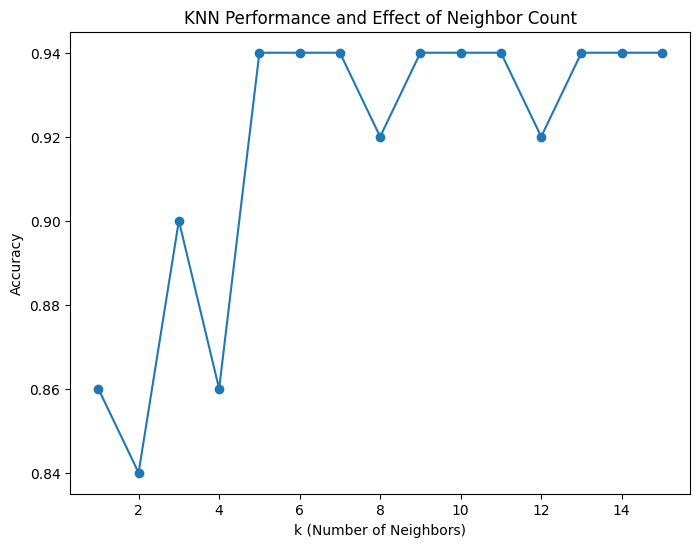

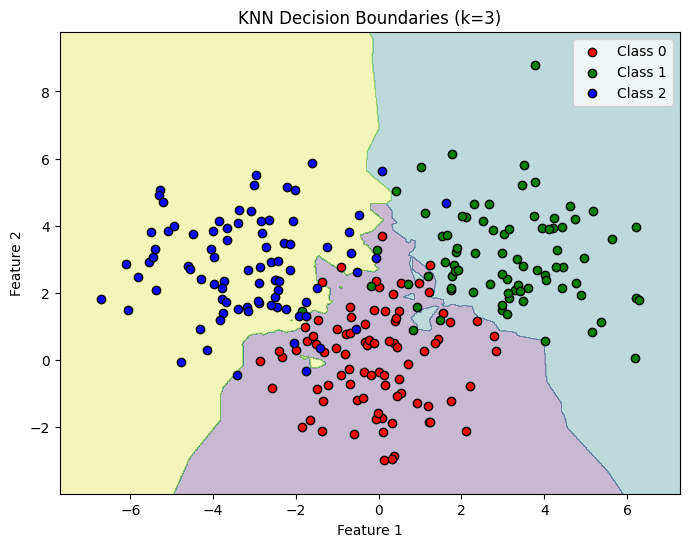

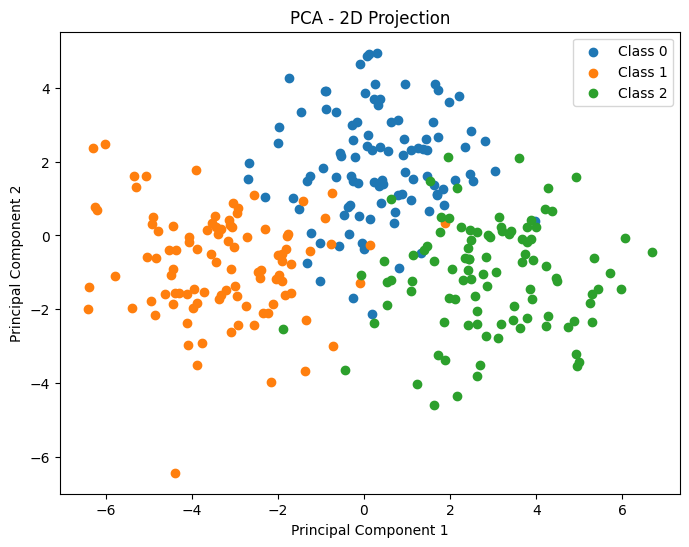

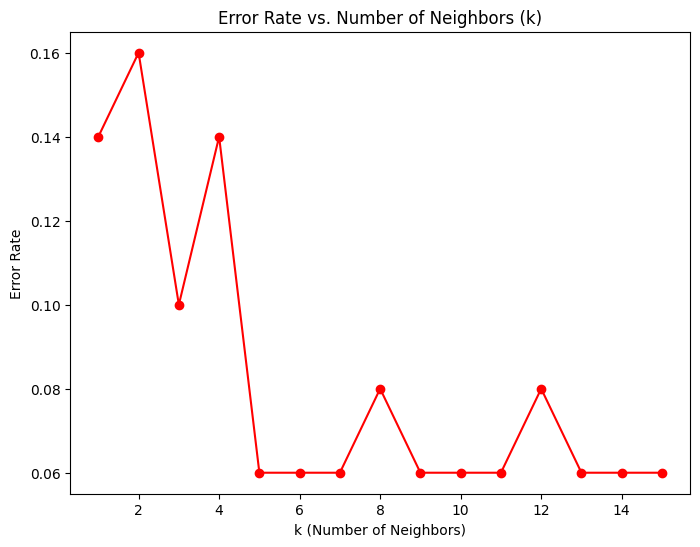

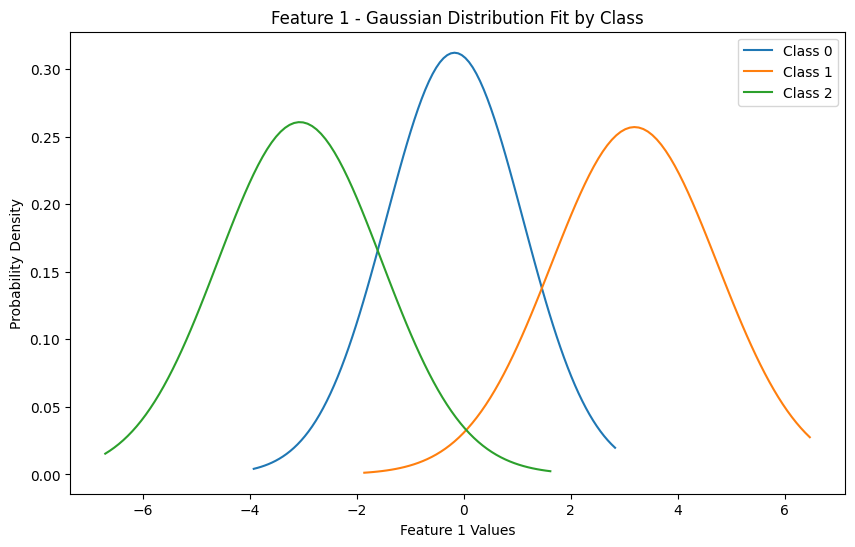

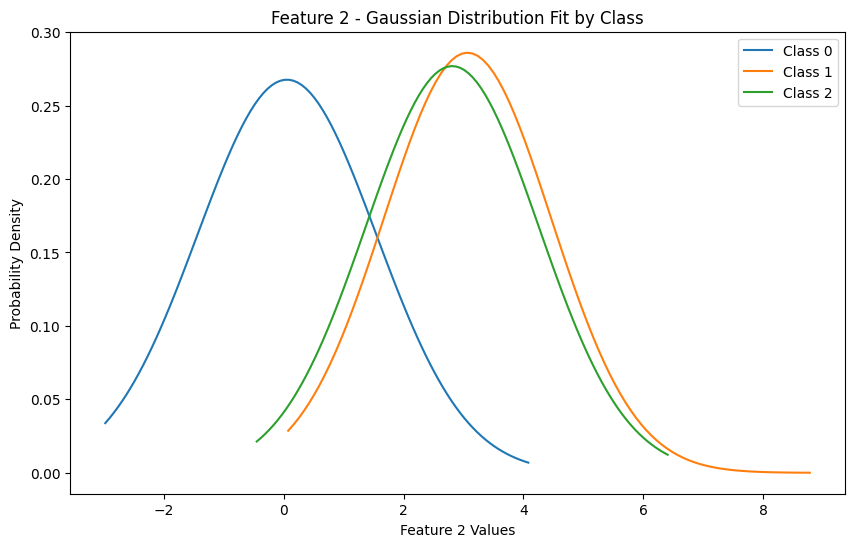

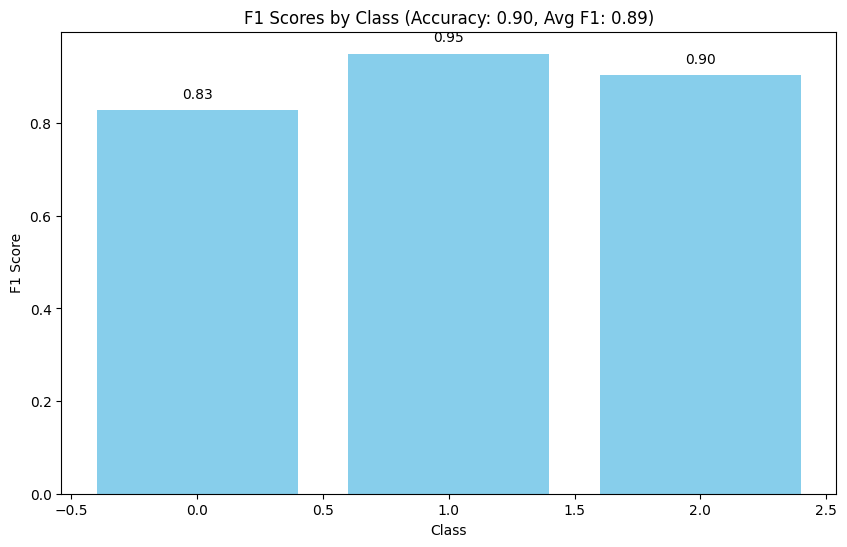

In [ ]:
np.random.seed(42)
#generate synthetic 2D data for three classes
class_0 = np.random.randn(100, 2) * 1.5 + np.array([0, 0]) #cluster around (0, 0)
class_1 = np.random.randn(100, 2) * 1.5 + np.array([3, 3]) #cluster around (3, 3)
class_2 = np.random.randn(100, 2) * 1.5 + np.array([-3, 3]) #cluster around (-3, 3)

X = np.vstack((class_0, class_1, class_2)) #combine classes into one dataset and create labels
y = np.hstack((np.zeros(100), np.ones(100), np.full(100, 2)))

indices = np.random.permutation(len(X)) #shuffle the data to mix the classes
X = X[indices]
y = y[indices]

X_train, y_train = X[:250], y[:250] #split data into training and testing sets
X_test, y_test = X[250:], y[250:]

viz = Visualization()

#compare custom models with library implementations
custom_knn = KNN(X_train, y_train, k=3)
custom_gnb = GNB(X_train, y_train)
custom_gnb.fit()

viz.compare_with_library_models(X_train, y_train, X_test, y_test, custom_knn, custom_gnb)

#plot performance of KNN with varying k values
viz.plot_performance_vs_k(X_train, y_train, X_test, y_test, max_k=15)

#plot decision boundaries of KNN with k=3
viz.plot_knn_decision_boundaries(X_train, y_train, n_neighbors=3)

#plot PCA projection of data in 2D
viz.plot_pca_2d(X, y, n_components=2)

#plot error rate vs. k for KNN
viz.plot_error_rate_vs_k(X_train, y_train, X_test, y_test, max_k=15)

#visualize Gaussian Naive Bayes feature distributions
viz.plot_gnb_distributions(X, y)

#display the accuracy and F1 scores for each class in a bar chart
y_pred = custom_knn.predict(X_test)
viz.plot_classification_report(y_test, y_pred)

# Experiments (45 points)

Use Sklearn classes

---

Dataset preparation

In [2]:
# Load dataset and split to train and test set
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=454)

# Calculate the frequency of each class in the training set
unique_classes_test, class_counts_test = np.unique(y_test, return_counts=True)
unique_classes_train, class_counts_train = np.unique(y_train, return_counts=True)

for cls_train, count_train, cls_test, count_test in zip(unique_classes_train, class_counts_train, unique_classes_test, class_counts_test):
  print(f"Class {cls_train}: {count_train} train  {count_test} test {count_train/count_test} ratio")

Class 0: 144 train  34 test 4.235294117647059 ratio
Class 1: 137 train  45 test 3.0444444444444443 ratio
Class 2: 150 train  27 test 5.555555555555555 ratio
Class 3: 145 train  38 test 3.8157894736842106 ratio
Class 4: 145 train  36 test 4.027777777777778 ratio
Class 5: 144 train  38 test 3.789473684210526 ratio
Class 6: 146 train  35 test 4.171428571428572 ratio
Class 7: 142 train  37 test 3.8378378378378377 ratio
Class 8: 143 train  31 test 4.612903225806452 ratio
Class 9: 141 train  39 test 3.6153846153846154 ratio


Apply classification methods using the dataset directly (10 points)
(parametre denemeleri tarzı şeyler)

In [ ]:
print("Logistic Regression:")
for c in [0.01, 0.1, 1, 10]:
  model = LogisticRegression(max_iter = 10000, C = c)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"accuracy with C set to {c}: {accuracy:.4f}")

print("\nK-Nearest Neighbors:")
for n in [3, 5, 7, 9, 11]:
  model = KNeighborsClassifier(n_neighbors = n)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"accuracy with n_neighbors set to {n}: {accuracy:.4f}")

print("")

for w in ['uniform', 'distance']:
  model = KNeighborsClassifier(n_neighbors = 3, weights = w)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"accuracy with weights set to {w}: {accuracy:.4f}")

print("")

for m in ['euclidean', 'manhattan']:
  model = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = m)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"accuracy with metric set to {m}: {accuracy:.4f}")

print("\nNaive Bayes:")
for v in [1e-9, 1e-8, 1e-7]:
    model = GaussianNB(var_smoothing = v)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy with var_smoothing set to {v}: {accuracy:.4f}")


Logistic Regression:
accuracy with C set to 0.01: 0.9750
accuracy with C set to 0.1: 0.9750
accuracy with C set to 1: 0.9667
accuracy with C set to 10: 0.9583

K-Nearest Neighbors:
accuracy with n_neighbors set to 3: 0.9778
accuracy with n_neighbors set to 5: 0.9722
accuracy with n_neighbors set to 7: 0.9694
accuracy with n_neighbors set to 9: 0.9722
accuracy with n_neighbors set to 11: 0.9722

accuracy with weights set to uniform: 0.9778
accuracy with weights set to distance: 0.9750

accuracy with metric set to euclidean: 0.9778
accuracy with metric set to manhattan: 0.9722

Naive Bayes:
accuracy with var_smoothing set to 1e-09: 0.8500
accuracy with var_smoothing set to 1e-08: 0.8722
accuracy with var_smoothing set to 1e-07: 0.8861


Apply PCA and find optimal #components with the best reconstruction (RMSE) as the objective (10 points)

In [3]:
best_n_components = 0 #initialize best values for n_components and RMSE
best_rmse = float('inf') #start with an infinitely high value for comparison

for n_components in range(1, digits.data.shape[1]):
    pca = SklearnPCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)

    #reconstruct the data from the reduced components
    X_train_reconstructed = pca.inverse_transform(X_train_pca)

    rmse = root_mean_squared_error(X_train, X_train_reconstructed) #no y_pred and y_test since we don't predict

    if(rmse < best_rmse): #update best RMSE if smaller than current best
        best_rmse = rmse
        best_n_components = n_components

    if(best_rmse == 0.0):
            break

print(f"Best number of components is {best_n_components}, with an RMSE of {best_rmse:.4f}.")

Best number of components is 62, with an RMSE of 0.0000.


Apply PCA class-wise and merge the transformed features (10 points)

In [ ]:
#apply class-wise PCA and transform training set
classes = np.unique(y_train)  #get unique classes
X_train_classes = []
y_train_classes = []

pca_models = {}  #dictionary to store fitted PCA models for each class

for c in classes:
  #select samples of class c in training set and apply PCA
  c_X_train = X_train[y_train == c]
  pca = SklearnPCA(n_components=10)
  c_pca_train = pca.fit_transform(c_X_train)
  X_train_classes.append(c_pca_train)
  y_train_classes.append(y_train[y_train == c])
  pca_models[c] = pca  # Store fitted PCA model

#concatenate transformed features and labels for training set
X_train_classwise_merged = np.vstack(X_train_classes)
y_train_classwise_merged = np.hstack(y_train_classes)
print(f"Shape of transformed class-wise features for training set: {X_train_classwise_merged.shape}")

#transform test set using the same PCA models fitted on each class's training data
X_test_classes = []
y_test_classes = []

for c in classes:
  #select samples of class c in test set and transform using pre-fitted PCA
  c_X_test = X_test[y_test == c]
  c_pca_test = pca_models[c].transform(c_X_test) #use training PCA model for transformation
  X_test_classes.append(c_pca_test)
  y_test_classes.append(y_test[y_test == c])

#concatenate transformed features and labels for test set
X_test_classwise_merged = np.vstack(X_test_classes)
y_test_classwise_merged = np.hstack(y_test_classes)
print(f"Shape of transformed class-wise features for test set: {X_test_classwise_merged.shape}")


Shape of transformed class-wise features for training set: (1437, 10)
Shape of transformed class-wise features for test set: (360, 10)


Apply classification methods on the transformed features (PCA outputs) both normal and class-wise (15 points)
(normal PCA dimension 30, class-wise PCA dimension 3x10)

In [ ]:
#train and evaluate classifier on class-wise PCA features
clf_classwise = KNeighborsClassifier(n_neighbors=3)
clf_classwise.fit(X_train_classwise_merged, y_train_classwise_merged)
y_pred_classwise = clf_classwise.predict(X_test_classwise_merged)
accuracy_classwise = accuracy_score(y_test_classwise_merged, y_pred_classwise)
print(f"Class-wise PCA Classification accuracy: {accuracy_classwise:.4f}")

#normal PCA
pca_normal = SklearnPCA(n_components=30)
X_train_normal_pca = pca_normal.fit_transform(X_train)
X_test_normal_pca = pca_normal.transform(X_test)

clf_normal = KNeighborsClassifier(n_neighbors=3)
clf_normal.fit(X_train_normal_pca, y_train)
y_pred_normal = clf_normal.predict(X_test_normal_pca)
accuracy_normal = accuracy_score(y_test, y_pred_normal)
print(f"Normal PCA Classification accuracy: {accuracy_normal:.4f}")

Class-wise PCA Classification accuracy: 0.5083
Normal PCA Classification accuracy: 0.9778
